Binary Classification Project

In [8]:
import pandas as pds

file = ('creditcard_2023.csv')
df =  pds.read_csv(file)

df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Check for null values and duplicate values:

In [9]:
df_null_count = df.isnull().sum()
df_duplicate_count = df.duplicated().sum()
if df_null_count.sum() == 0:
    print("No null values in the dataset")
else:
    print("There are this many null values: " + df_null_count)

if df_duplicate_count == 0:
    print("No duplicate values in the dataset")
else:
    print("There are this many duplicate values: " + df_duplicate_count)

No null values in the dataset
No duplicate values in the dataset


Need to remove features with low variance or no variance because they will not contribute much to the model and could cause overfitting if left in the dataset.

In [10]:
# Calculate the variance of each feature
variances = df.var()

# Sort the features by variance in ascending order
sorted_variances = variances.sort_values()

print(sorted_variances)

Class     2.500004e-01
V7        1.000002e+00
V28       1.000002e+00
V6        1.000002e+00
V26       1.000002e+00
V3        1.000002e+00
V2        1.000002e+00
V18       1.000002e+00
V23       1.000002e+00
V10       1.000002e+00
V25       1.000002e+00
V27       1.000002e+00
V17       1.000002e+00
V21       1.000002e+00
V20       1.000002e+00
V13       1.000002e+00
V9        1.000002e+00
V8        1.000002e+00
V22       1.000002e+00
V24       1.000002e+00
V5        1.000002e+00
V11       1.000002e+00
V19       1.000002e+00
V16       1.000002e+00
V12       1.000002e+00
V14       1.000002e+00
V4        1.000002e+00
V1        1.000002e+00
V15       1.000002e+00
Amount    4.788148e+07
id        2.694505e+10
dtype: float64


All the variances are very similar, so we will use correlation analysis next to remove a column that is tightly correlated with another column.

In [11]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated features
print(highly_correlated)
highly_correlated.discard('Class')
print(highly_correlated)
df_reduced = df.drop(columns=highly_correlated)
df_reduced = df_reduced.drop(columns='id')
df_reduced

{'V18', 'V17', 'Class'}
{'V18', 'V17'}


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Now two highly correlated columns have been removed to reduce redundancy, which is a 6.4516% decrease in features, along with removing the id variable.

We can also reduce the number of features by removing quasi-constant features, which is a column that has 99% of the same data from column to column.

In [12]:
label_counts = df_reduced['Class'].value_counts()

print(label_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


There are an equal number of Class types of 0 and 1, so there is no need for oversampling or undersampling.

Decision Tree:

Accuracy: 0.9979688022088177


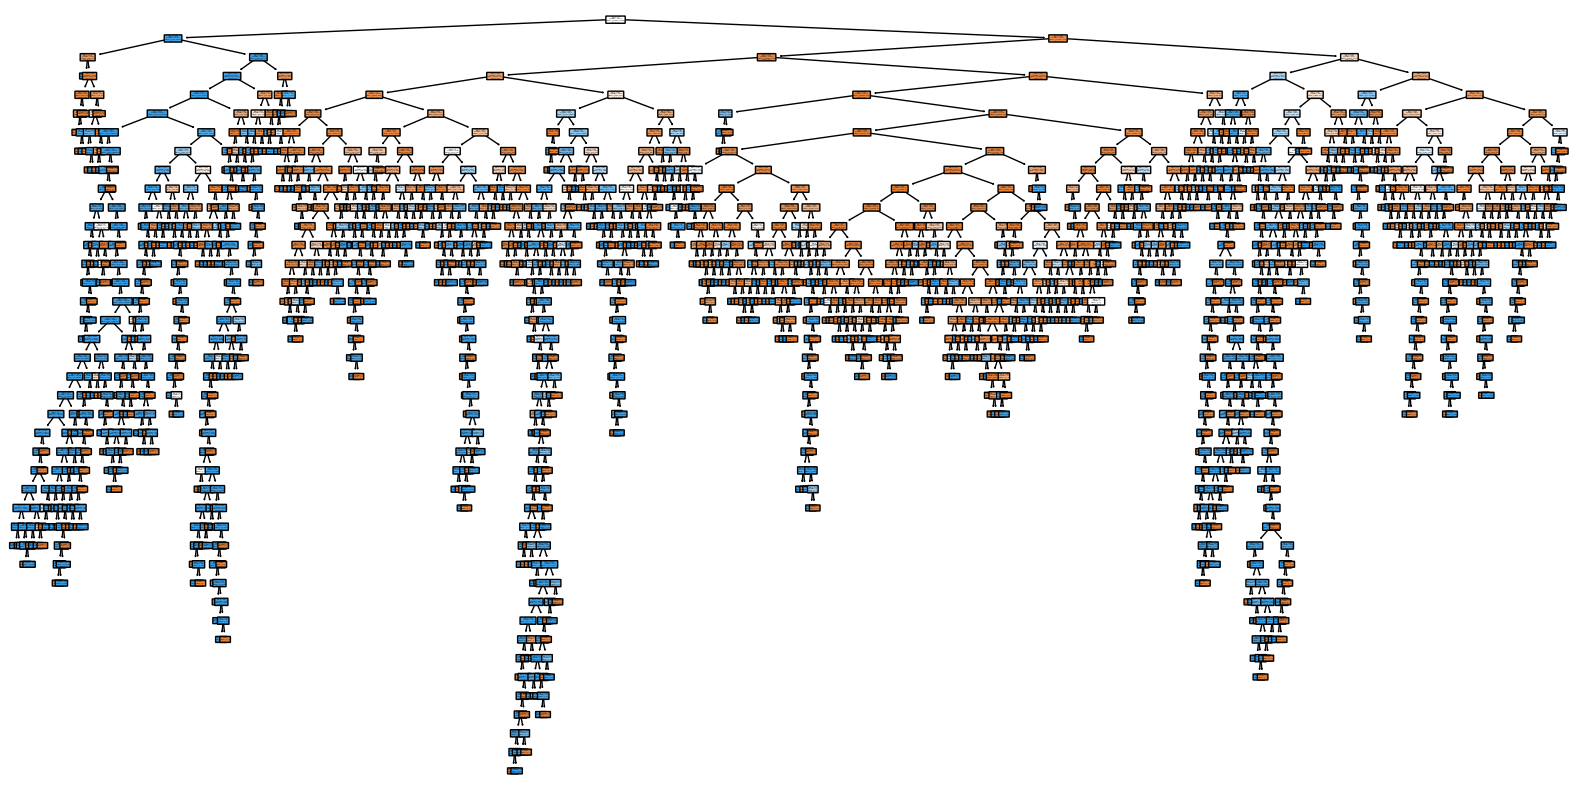

Confusion Matrix:
 [[56577   173]
 [   58 56918]]
True Positives (TP): 56918
False Positives (FP): 173
True Negatives (TN): 56577
False Negatives (FN): 58


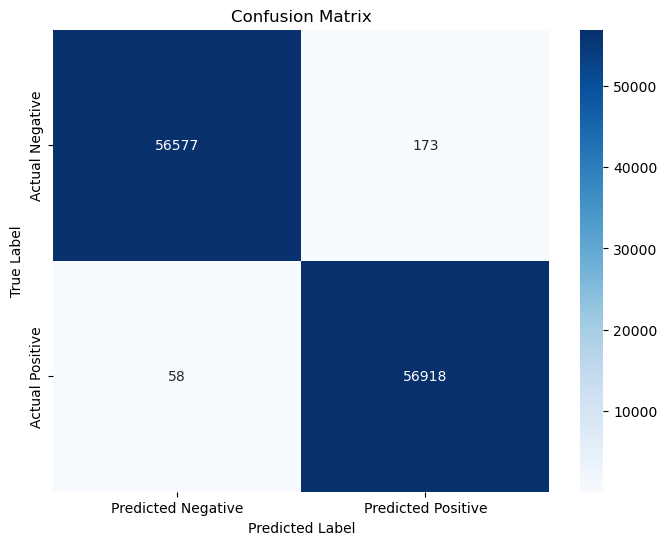

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf =  DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualizr the decision tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()


from sklearn.metrics import confusion_matrix, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Optional: Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

k-Nearest Neighbors:

Accuracy: 0.9360744244939592
Confusion Matrix:
 [[55561  1189]
 [ 3571 53405]]
True Positives (TP): 53405
False Positives (FP): 1189
True Negatives (TN): 55561
False Negatives (FN): 3571


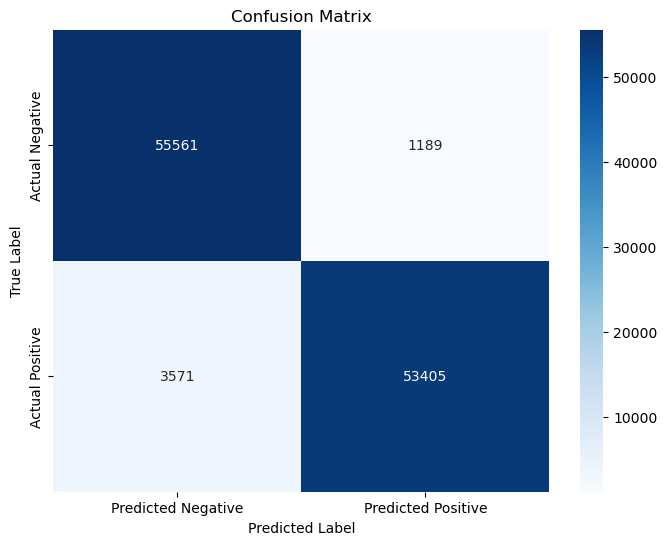

Accuracy: 0.9176089900286654


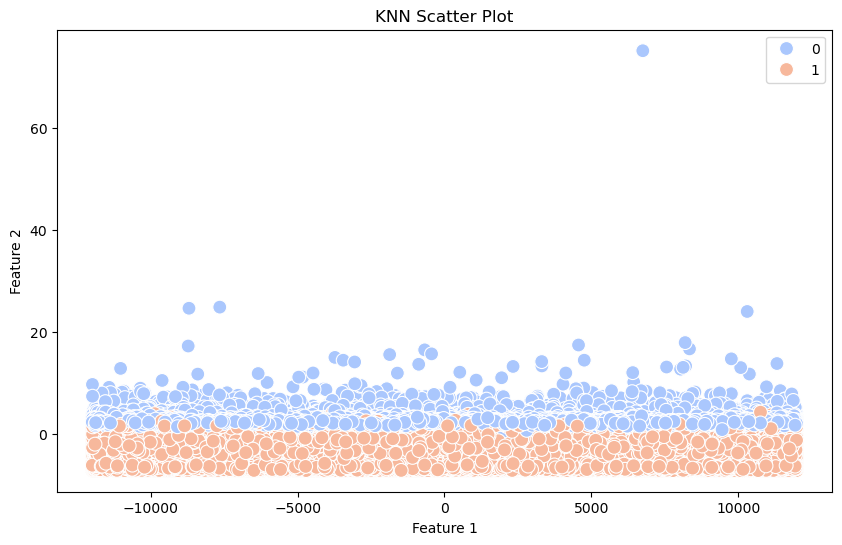

In [17]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier with k=5 but need to find best k
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Try to make a way to visualize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Accuracy Plot for different k values
# k_values = range(100, 1000, 100)
# accuracies = []

# for k in range(100, 1000, 100):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     accuracies.append(knn.score(X_test, y_test))

# plt.figure(figsize=(10, 6))
# plt.plot(k_values, accuracies, marker='o')
# plt.title('KNN Accuracy for different k values')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.show()  

# 2 dimensional reduction plots
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create KNN classifier with k=5 but need to find best k
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_pca, y_train)

# Make predictions
predictions = knn.predict(X_test_pca)

# Evaluate the model
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Convert to NumPy arrays
y_train_np = y_train.to_numpy()

# Decision Boundary Plot
# plt.figure(figsize=(10, 6))
# plot_decision_regions(X_train_pca, y_train_np, clf=knn, legend=2)
# plt.title('KNN Decision Boundary')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# Scatter Plot with Neighbors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_np, palette='coolwarm', s=100)
plt.title('KNN Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Gaussian Naïve Bayes:

Accuracy: 0.8990995902432162
F1: 0.8983913840555533
Confusion Matrix:
 [[55817   933]
 [10542 46434]]
True Positives (TP): 46434
False Positives (FP): 933
True Negatives (TN): 55817
False Negatives (FN): 10542


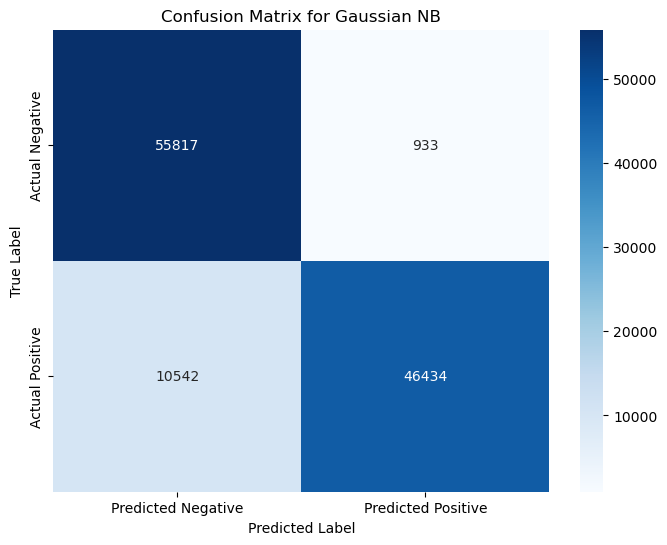

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a gaussian NB classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and f1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Showcase performance using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gaussian NB")
plt.show()

Logistic Regression: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and f1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Showcase performance using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
